# perception test 简单使用感知机对数据进行二分类

第一步：制作数据

In [13]:
%pylab
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
# import numpy as np
# import matplotlib.pyplot as plt
iris = load_iris()

data = iris.data
data = data[:100]
labels = iris.target
labels = labels[:100]
feature_name = iris.feature_names

data = data[:, 0:2]
labels[labels == 0] = -1
feature_name = feature_name[:2]

X_train, X_test, y_train, y_test = train_test_split(data, labels)

Using matplotlib backend: QtAgg
Populating the interactive namespace from numpy and matplotlib


第二步： 定义perception类

In [20]:
class my_perception():
    def __init__(self, lr=0.01):
        self.w = 0
        self.b = 0
        self.lr = lr
        
    def fit(self, X, y):
        w = np.zeros(len(X[0]))
        b = 0
        lr = self.lr
        all_true = False
        
        while not all_true:
            all_true = True
            for i in range(len(X)):
                if y[i]*(np.dot(w, X[i]) + b) <= 0:
                    all_true = False
                    w += lr*y[i]*X[i]
                    b += lr*y[i]
                    
        self.w = w
        self.b = b
    
    def predict(self, X):
        res = []
        for i in range(len(X)):
            if np.dot(self.w, X[i]) + b <= 0:
                res.append(-1)
            else:
                res.append(1)
        return np.array(res)
    
    def score(self, y_predict, y_test):
        return np.mean(y_predict == y_test)

第三步：代码测试

Text(0, 0.5, 'sepal width (cm)')

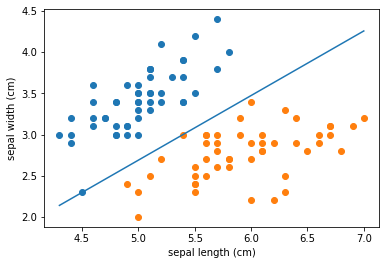

In [77]:
clf = my_perception()
clf.fit(X_train, y_train)
w = clf.w
b = clf.b

plt.scatter(data[:50, 0], data[:50, 1])
plt.scatter(data[50:-1, 0], data[50:-1, 1])
xx = np.linspace(data[:, 0].min(), data[:, 0].max(), 100)
yy = -(w[0]*xx + b)/w[1]
plt.plot(xx, yy)
plt.xlabel(feature_name[0])
plt.ylabel(feature_name[1])